# Predicting Top 10 HR Hitters in 2022

Zubin Srivastava

In [1]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import matplotlib.pyplot as plt
from pandasql import sqldf

The dataset used was obtained from Baseball Savant, representing players yearly stats from 2015-2021.

In [34]:
dataset = pd.read_csv('Downloads/stats.csv')
dataset = dataset.rename(columns={" first_name": "first_name"})
dataset = dataset.drop(columns=['Unnamed: 76'])

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,...,whiff_percent,swing_percent,pull_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,Unnamed: 76
0,Colon,Bartolo,112526,2015,42,58,64,8,7,1,...,28.7,58.1,20.5,30.8,79.7,69.2,5.1,17.9,7.7,NaN
1,Hunter,Torii,116338,2015,40,521,567,125,81,22,...,23.1,53.4,34.7,24.5,64.0,49.4,22.6,20.9,7.1,NaN
2,Ortiz,David,120074,2015,40,528,614,144,70,37,...,23.2,44.7,41.9,21.7,52.1,37.6,25.6,28.7,8.1,NaN
3,Rodriguez,Alex,121347,2015,40,523,620,131,75,22,...,32.0,43.9,38.4,17.1,60.3,43.6,24.9,24.9,6.5,NaN
4,Ramirez,Aramis,133380,2015,37,475,516,117,68,31,...,17.9,52.9,36.9,24.8,65.5,37.6,24.5,29.1,8.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,Franco,Wander,677551,2021,20,281,308,81,51,18,...,16.4,49.4,36.3,23.7,59.7,45.3,22.0,25.7,6.9,NaN
3717,Duran,Jarren,680776,2021,25,107,112,23,16,3,...,34.7,51.7,27.9,35.3,59.8,48.5,20.6,23.5,7.4,NaN
3718,Jeffers,Ryan,680777,2021,24,267,293,53,28,10,...,34.2,46.3,42.8,22.6,62.5,43.4,28.9,20.1,7.5,NaN
3719,Miller,Owen,680911,2021,25,191,202,39,27,8,...,26.2,48.9,29.0,31.2,60.4,55.8,15.9,24.6,3.6,NaN


The first goal is to determine the amount of home runs each player will hit per at bat next season. The reason for this is because 2020 was only a 60 game season, I felt that there was a season of less games could affect the accuracy of a model if solely looking for home runs hit in a season. The first step was to create a new column called "hr_per_pa" which represented the rate at which players hit a home run per plate appearance.

In [3]:
dataset['hr_per_pa'] = dataset['b_home_run']/dataset['b_total_pa']

In [4]:
dataset = dataset.sort_values(by=['player_id', 'year'], ascending=[True, True])
dataset

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,...,whiff_percent,swing_percent,pull_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,hr_per_pa
0,Colon,Bartolo,112526,2015,42,58,64,8,7,1,...,28.7,58.1,20.5,30.8,79.7,69.2,5.1,17.9,7.7,0.000000
1663,Colon,Bartolo,112526,2016,43,60,65,5,2,2,...,42.7,44.4,37.5,37.5,72.3,54.2,12.5,16.7,16.7,0.015385
1,Hunter,Torii,116338,2015,40,521,567,125,81,22,...,23.1,53.4,34.7,24.5,64.0,49.4,22.6,20.9,7.1,0.038801
2,Ortiz,David,120074,2015,40,528,614,144,70,37,...,23.2,44.7,41.9,21.7,52.1,37.6,25.6,28.7,8.1,0.060261
1664,Ortiz,David,120074,2016,41,537,626,169,82,48,...,19.2,43.5,47.6,16.6,52.0,33.8,28.4,29.0,8.7,0.060703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,Duran,Jarren,680776,2021,25,107,112,23,16,3,...,34.7,51.7,27.9,35.3,59.8,48.5,20.6,23.5,7.4,0.017857
3164,Jeffers,Ryan,680777,2020,23,55,62,15,12,0,...,33.3,42.3,30.6,27.8,62.9,52.8,13.9,25.0,8.3,0.048387
3718,Jeffers,Ryan,680777,2021,24,267,293,53,28,10,...,34.2,46.3,42.8,22.6,62.5,43.4,28.9,20.1,7.5,0.047782
3719,Miller,Owen,680911,2021,25,191,202,39,27,8,...,26.2,48.9,29.0,31.2,60.4,55.8,15.9,24.6,3.6,0.019802


In [5]:
arr = dataset[['player_id', 'year', 'b_home_run', 'b_total_pa']].to_numpy()
arr

array([[112526,   2015,      0,     64],
       [112526,   2016,      1,     65],
       [116338,   2015,     22,    567],
       ...,
       [680777,   2021,     14,    293],
       [680911,   2021,      4,    202],
       [683734,   2021,     15,    469]])

Next step was to add another column representing next year's hr/pa to train our model. If the season was not 2021 and it was not the player's final season, then we would list their hr rate for the next season, otherwise it would be NULL

In [6]:
next_year = []
for row in range(len(arr)):
    if(arr[row, 1] == 2021):
        next_year.append(None)
    elif(arr[row, 0] == arr[row+1, 0]):
        next_year.append((arr[row+1, 2])/arr[row+1, 3])
    else:
        next_year.append(None)

The array next year that represents the players hr/pa for their next season is added to the dataframe

In [7]:
dataset['next_year_hr_per_pa'] = next_year
dataset.iloc[:, [0,1,3,-2,-1]]
# Also a good reminder that Bartolo Colon once hit a home run

,last_name,first_name,year,hr_per_pa,next_year_hr_per_pa
0,Colon,Bartolo,2015,0.000000,0.015385
1663,Colon,Bartolo,2016,0.015385,NaN
1,Hunter,Torii,2015,0.038801,NaN
2,Ortiz,David,2015,0.060261,0.060703
1664,Ortiz,David,2016,0.060703,NaN
...,...,...,...,...,...
3717,Duran,Jarren,2021,0.017857,NaN
3164,Jeffers,Ryan,2020,0.048387,0.047782
3718,Jeffers,Ryan,2021,0.047782,NaN
3719,Miller,Owen,2021,0.019802,NaN


Next I start preparing to build my model. Todel will predict the player's next year hr/pa, I am going to train and test my model on seasons prior to 2021. After it is tested, I will make predictions on data from the 2021 season.

In [8]:
copy = dataset[(dataset['year'] < 2021) & (dataset['b_total_pa'] >= 100)]
copy = copy.dropna()
copy

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,...,swing_percent,pull_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,hr_per_pa,next_year_hr_per_pa
2,Ortiz,David,120074,2015,40,528,614,144,70,37,...,44.7,41.9,21.7,52.1,37.6,25.6,28.7,8.1,0.060261,0.060703
3,Rodriguez,Alex,121347,2015,40,523,620,131,75,22,...,43.9,38.4,17.1,60.3,43.6,24.9,24.9,6.5,0.053226,0.037037
5,Beltre,Adrian,134181,2015,36,567,619,163,109,32,...,48.1,35.3,23.3,61.9,42.4,18.4,31.6,7.6,0.029079,0.050000
1666,Beltre,Adrian,134181,2016,37,583,640,175,111,31,...,48.7,36.9,25.6,60.3,41.2,24.0,25.2,9.6,0.050000,0.043702
2205,Beltre,Adrian,134181,2017,38,340,389,106,66,22,...,46.8,34.0,25.2,59.9,43.2,24.5,26.2,6.1,0.043702,0.031185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Paredes,Isaac,670623,2020,21,100,108,22,17,4,...,41.9,39.5,30.3,57.4,50.0,14.5,28.9,6.6,0.009259,0.011765
1662,Brosseau,Mike,670712,2019,25,132,142,36,23,7,...,52.6,35.1,30.9,58.5,41.5,25.5,22.3,10.6,0.042254,0.051020
3160,Garcia,Luis,671277,2020,20,134,139,37,29,6,...,49.9,37.1,33.3,61.2,61.9,7.6,26.7,3.8,0.014388,0.024291
3161,Robert,Luis,673357,2020,23,202,227,47,28,8,...,57.6,32.8,29.0,67.8,38.2,17.6,33.6,10.7,0.048458,0.043919


I originally began with all columns from the data that was downloaded, and I removed columns that were making my mean squared error (MSE) higher, by viewing the feature importance graph below. The columns that are now implemented are the ones that are increasing my accuracy by lowering the MSE. The graph clearly shows that the features xISO and barrel_batted_rate are the two most important in increasing accuracy, but there are 13 others that also help the model as well.

In [9]:
features = copy.iloc[:, [4,9,11,\
                        31,32,\
                        42,44,45,47,50,\
                        61,68,71,75,76]]
features

,player_age,b_double,b_home_run,xobp,xiso,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,poorlyunder_percent,hard_hit_percent,pitch_count_breaking,swing_percent,f_strike_percent,popups_percent,hr_per_pa
2,40,37,37,0.385,0.312,34.8,13.1,8.4,24.0,49.5,572,44.7,52.1,8.1,0.060261
3,40,22,33,0.354,0.246,31.4,10.9,8.1,23.9,44.2,619,43.9,60.3,6.5,0.053226
5,36,32,18,0.343,0.185,35.7,5.5,7.8,23.5,40.8,524,48.1,61.9,7.6,0.029079
1666,37,31,32,0.348,0.218,34.2,8.5,5.6,27.9,40.7,682,48.7,60.3,9.6,0.050000
2205,38,22,17,0.360,0.181,36.1,5.8,6.5,25.5,32.5,481,46.8,59.9,6.1,0.043702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,21,4,1,0.268,0.060,35.5,0.0,5.3,28.9,26.3,171,41.9,57.4,6.6,0.009259
1662,25,7,6,0.265,0.141,31.9,4.3,6.4,34.0,36.2,177,52.6,58.5,10.6,0.042254
3160,20,6,2,0.293,0.110,27.6,4.8,2.9,10.5,29.5,157,49.9,61.2,3.8,0.014388
3161,23,8,11,0.293,0.238,36.6,13.0,9.2,24.4,40.5,326,57.6,67.8,10.7,0.048458


x is my inputs, and y is my outputs, the column "next_year_hr_per_pa"

In [10]:
x = np.array(features)
y = np.array(copy.iloc[:, -1])

I created a train_test_split from my x and y data, is 75% training and 25% testing to reduce overfitting

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

I chose to use a random forest mdoel for predicting each player's next year's hr/pa. I felt a random forest was best because of the multiple decision trees that are used to make the prediction. 

In [12]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

RandomForestRegressor()

In [13]:
preds = clf.predict(x_test)

Evaluating feature importance using permutation. Error bars are graphed upon bar graph that represent the standard deviation of each feature for their decrease in accuracy.

In [14]:
from sklearn.inspection import permutation_importance
feature_names = [feat for feat in features]
result = permutation_importance(clf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances

player_age              0.001313
b_double                0.005781
b_home_run              0.007743
xobp                    0.003490
xiso                    0.107544
sweet_spot_percent      0.016038
barrel_batted_rate      0.099880
solidcontact_percent    0.014236
poorlyunder_percent     0.036821
hard_hit_percent        0.037226
pitch_count_breaking    0.011617
swing_percent           0.002037
f_strike_percent        0.005568
popups_percent          0.013486
hr_per_pa               0.011301
dtype: float64

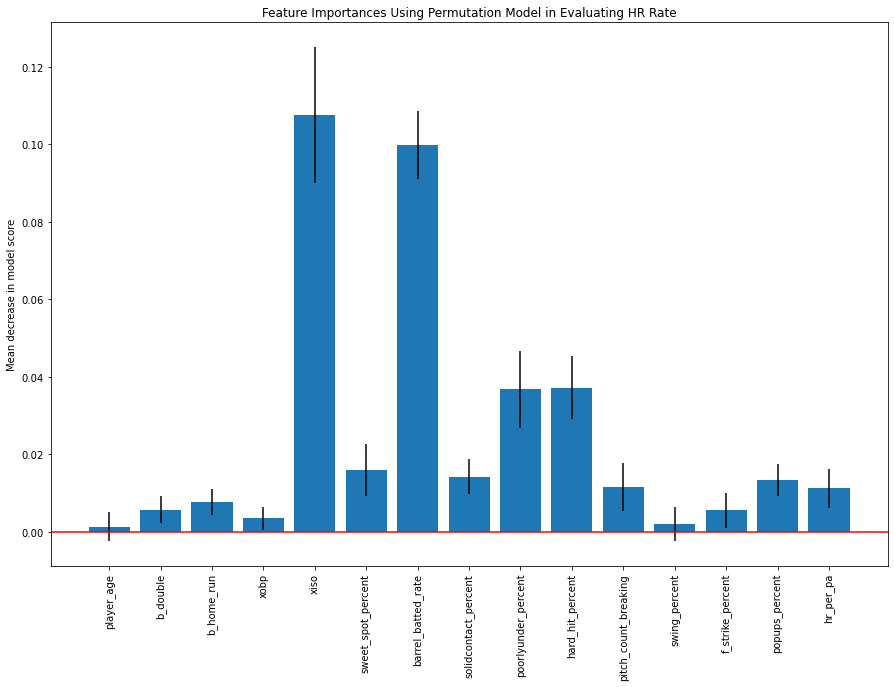

In [15]:
plt.figure(figsize=(15,10))
plt.bar(feature_names, forest_importances, yerr = result.importances_std)
plt.xticks(rotation='vertical')
plt.ylabel("Mean decrease in model score")
plt.axhline(y=0, color='r')
plt.title("Feature Importances Using Permutation Model in Evaluating HR Rate")
plt.show()


In [16]:
pd.set_option('display.max_rows', 500)
forest_importances


player_age              0.001313
b_double                0.005781
b_home_run              0.007743
xobp                    0.003490
xiso                    0.107544
sweet_spot_percent      0.016038
barrel_batted_rate      0.099880
solidcontact_percent    0.014236
poorlyunder_percent     0.036821
hard_hit_percent        0.037226
pitch_count_breaking    0.011617
swing_percent           0.002037
f_strike_percent        0.005568
popups_percent          0.013486
hr_per_pa               0.011301
dtype: float64

I used Mean-Squared Error (MSE) to evaluate the quality of the model built upon the features that were used as training data. My MSE is shown below.

In [17]:
n = x_test.shape[0]
amt = np.sum((preds-y_test)**2)
mse = 1/n*(amt)
mse

0.00017040566521815564

After building the model, it's time run the model on the data from 2021, to predict their hr/pa rate for 2022, and finally predict the top 10 home run hitters for next year

In [18]:
data_2021 = dataset[(dataset['year'] == 2021)]
data_2021

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,...,swing_percent,pull_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,hr_per_pa,next_year_hr_per_pa
3165,Pujols,Albert,405395,2021,41,275,296,65,45,3,...,47.1,46.1,25.4,54.1,46.1,26.7,19.4,7.8,0.057432,NaN
3166,Cabrera,Miguel,408234,2021,38,472,526,121,90,16,...,49.4,32.8,30.0,62.5,49.0,25.9,21.5,3.6,0.028517,NaN
3167,Rivera,Rene,425784,2021,38,69,78,16,11,3,...,50.3,48.8,23.3,60.3,53.5,23.3,18.6,4.7,0.025641,NaN
3168,Wainwright,Adam,425794,2021,40,57,74,7,5,2,...,56.7,39.1,10.9,71.6,76.1,10.9,10.9,2.2,0.000000,NaN
3169,Molina,Yadier,425877,2021,39,440,473,111,81,19,...,57.1,43.4,22.3,72.7,42.6,29.1,21.7,6.6,0.023256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,Franco,Wander,677551,2021,20,281,308,81,51,18,...,49.4,36.3,23.7,59.7,45.3,22.0,25.7,6.9,0.022727,NaN
3717,Duran,Jarren,680776,2021,25,107,112,23,16,3,...,51.7,27.9,35.3,59.8,48.5,20.6,23.5,7.4,0.017857,NaN
3718,Jeffers,Ryan,680777,2021,24,267,293,53,28,10,...,46.3,42.8,22.6,62.5,43.4,28.9,20.1,7.5,0.047782,NaN
3719,Miller,Owen,680911,2021,25,191,202,39,27,8,...,48.9,29.0,31.2,60.4,55.8,15.9,24.6,3.6,0.019802,NaN


Using the same features that were used to build the random forest

In [19]:
x_2021 = data_2021.iloc[:, [0,1,2,4,9,11,\
                        31,32,\
                        42,44,45,47,50,\
                        61,68,71,75,76]]

In [20]:
x_input = x_2021.iloc[:, 3:].to_numpy()
preds_2022 = clf.predict(x_input)

After model is run on 2022 data, I create a new column on the input data for 2021 called "hr_per_ab_22_pred" which represents the prediction of hr/pa in 2022

In [21]:
x_2021.loc[:, 'hr_per_ab_22_pred'] = preds_2022

In [22]:
x_2021 = x_2021.sort_values('hr_per_ab_22_pred', ascending=False)
x_2021

,last_name,first_name,player_id,player_age,b_double,b_home_run,xobp,xiso,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,poorlyunder_percent,hard_hit_percent,pitch_count_breaking,swing_percent,f_strike_percent,popups_percent,hr_per_pa,hr_per_ab_22_pred
3339,Judge,Aaron,592450,29,24,39,0.388,0.277,38.5,17.6,9.1,17.6,58.4,895,42.5,59.4,2.8,0.061611,0.060710
3357,Sano,Miguel,593934,28,24,30,0.304,0.219,32.3,17.7,5.2,28.8,55.9,753,44.6,60.7,8.3,0.056391,0.059413
3590,Schwarber,Kyle,656941,28,19,32,0.372,0.290,36.9,17.5,6.9,24.5,52.2,585,41.4,55.4,6.2,0.067941,0.058798
3605,Ohtani,Shohei,660271,27,26,46,0.380,0.333,35.4,22.3,6.6,21.7,53.6,819,45.8,57.1,4.9,0.071987,0.058420
3241,Stanton,Giancarlo,519317,32,19,35,0.342,0.231,32.6,15.7,11.0,19.9,56.3,770,44.2,56.5,7.3,0.060449,0.058066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,Wade,Tyler,642180,27,5,0,0.289,0.047,24.4,1.1,1.1,16.7,13.8,176,43.9,55.2,6.7,0.000000,0.008572
3348,Simmons,Andrelton,592743,32,12,3,0.289,0.050,29.1,0.6,1.1,23.2,21.8,544,45.0,61.9,7.1,0.006652,0.007962
3535,Sierra,Magneuris,642423,25,6,0,0.275,0.037,26.3,0.0,0.6,21.9,18.8,229,50.3,64.4,10.6,0.000000,0.007545
3608,Hernandez,Yonny,660634,23,5,0,0.342,0.045,39.8,0.9,0.0,16.8,15.9,135,38.0,61.4,4.4,0.000000,0.007531


Now that our rate is evaluated from the random forest, the next step is predicting how many home runs they will hit next year based upon the predicted rate as well as the number of plate appearances the player will have. In order to finish in the top 10, one can assume that the players will be healthy for the season, so I set next year's number of plate appearances as the maximum amount of pa's that they have had in a season so far throughout their career. Also, because 2020 was a shortened season, I represented each player's plate appearances as if it were a full 162 game season, by multiplying their pa's by 162/20, so that it remained linear. Then the maximum plate appearance's were selected as the estimate that each player will have in 2022.

In [35]:
players = pd.read_csv("Downloads/players_pa.csv")
players = players.drop(columns=['Unnamed: 5'])
players = players.rename(columns={" first_name": "first_name"})

players = sqldf("SELECT t1.player_id, t1.last_name, t1.first_name, t1.year, t2.player_age, CASE WHEN (t1.year = 2020) \
THEN (t1.b_total_pa * 162 / 60)  ELSE (t1.b_total_pa) END AS b_total_pa \
FROM players AS t1 INNER JOIN dataset AS t2 ON t1.player_id = t2.player_id AND t1.year = t2.year \
ORDER BY t1.year DESC")

players = sqldf("SELECT player_id, last_name, first_name, MAX(player_age) AS player_age, MAX(b_total_pa) \
AS num_pas FROM players GROUP BY last_name, first_name")

,last_name,first_name,player_id,year,b_total_pa,Unnamed: 5
0,Colon,Bartolo,112526,2016,65,NaN
1,Ortiz,David,120074,2016,626,NaN
2,Rodriguez,Alex,121347,2016,243,NaN
3,Beltre,Adrian,134181,2016,640,NaN
4,Beltran,Carlos,136860,2016,593,NaN
...,...,...,...,...,...,...
3716,Happ,Ian,664023,2017,413,NaN
3717,Bader,Harrison,664056,2017,92,NaN
3718,Stevenson,Andrew,664057,2017,66,NaN
3719,Hwang,Jae-Gyun,666561,2017,57,NaN


The full dataframe representing the player, his predicted hr/pa for 2022 derived from the model, and the number of plate appearances based upon the maximum amount of plate appearances they have had in a season so far throughout their career.

In [24]:
full_df = sqldf("SELECT x_2021.player_id, players.last_name, players.first_name, players.player_age, \
x_2021.hr_per_ab_22_pred, players.num_pas FROM \
x_2021 LEFT JOIN players ON x_2021.player_id = players.player_id")
full_df

,player_id,last_name,first_name,player_age,hr_per_ab_22_pred,num_pas
0,592450,Judge,Aaron,29,0.060710,678
1,593934,Sano,Miguel,28,0.059413,553
2,656941,Schwarber,Kyle,28,0.058798,610
3,660271,Ohtani,Shohei,27,0.058420,639
4,519317,Stanton,Giancarlo,32,0.058066,705
...,...,...,...,...,...,...
551,642180,Wade,Tyler,27,0.008572,283
552,592743,Simmons,Andrelton,32,0.007962,647
553,642423,Sierra,Magneuris,25,0.007545,225
554,660634,Hernandez,Yonny,23,0.007531,166


However, it is hard to believe that each player will have a perfectly healthy season, so I graphed the number of plate appearances in a season based upon a players age. It shows that players over 35 have not had more than 700 appearances since 2015 (the red lines), which is when the data I used began, and that it is rare for players over 38 (the green lines) to have more than 600 plate appearances in a season.

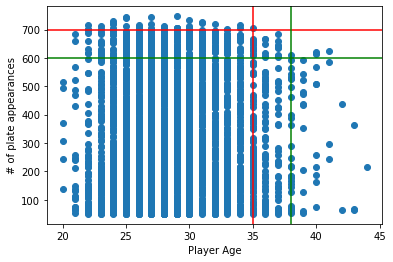

In [25]:
plt.scatter(dataset['player_age'], dataset['b_total_pa'])
plt.axvline(x=35, color='red')
plt.axhline(y=700, color='red')
plt.axvline(x=38, color='green')
plt.axhline(y=600, color='green')

plt.xlabel("Player Age")
plt.ylabel("# of plate appearances")
plt.show()

So I then altered the player_age column by increasing it by 1, so the age will represent what the age will be in 2022, and set caps on the number of plate appearances we can predict the player to have in 2022. First, players that are 36 and 37 will have a cap of 675 plate appearances, players older than 38 will have a cap of 600 plate appearances, and even though there have been a handful of players since 2015 that have had more than 700 plate appearances, it is a rare feat. Therefore I set a cap for players under 37 to have a maximum of 700 plate appearances for 2022. These caps are only implemented if a player has played a season where he had more plate appearances than the cap for his age.

In [26]:
full_df['player_age'] = full_df['player_age'] + 1

In [27]:
arr = full_df.loc[:,['player_age', 'num_pas']].to_numpy()
pa_amt = []
for elem in arr:
    if((elem[0] > 37) & (elem[1] > 600)):
        pa_amt.append(600)
    elif((elem[0] > 35) & (elem[1] > 675)):
        pa_amt.append(675)
    elif(elem[1] > 700):
        pa_amt.append(700)
    else:
        pa_amt.append(elem[1])

In [28]:
full_df['num_pas'] = pa_amt
full_df.sort_values("num_pas", ascending=False)

,player_id,last_name,first_name,player_age,hr_per_ab_22_pred,num_pas
192,607208,Turner,Trea,29,0.037131,700
14,502671,Goldschmidt,Paul,35,0.055793,700
189,514888,Altuve,Jose,32,0.037310,700
190,608324,Bregman,Alex,28,0.037236,700
71,593428,Bogaerts,Xander,30,0.046311,700
...,...,...,...,...,...,...
145,657277,Webb,Logan,26,0.040228,53
535,622608,Senzatela,Antonio,27,0.012134,51
67,621500,Mathisen,Wyatt,29,0.046840,51
499,672779,Marcano,Tucupita,23,0.017612,50


The last thing I wanted to take into account were rookies, and young players who might not have played a full season yet. To do this I wrote a query that represents players who only have one row of data from the original dataset, or less than 4 with an age of 25. I set the minimum number of plate appearances in a season to 200 which can be inferred as at least 2 months of playing time.

In [29]:
youngsters = sqldf("SELECT player_id, last_name, first_name, player_age, num_pas, COUNT(player_id) \
AS num_occurrences FROM (SELECT t1.player_id, t1.last_name, t1.first_name, t1.year, t2.num_pas, t1.player_age \
FROM dataset AS t1 INNER JOIN full_df AS t2 ON t1.player_id = t2.player_id ORDER BY year DESC) \
GROUP BY player_id HAVING year = 2021 AND num_pas >= 200 AND (num_occurrences = 1 OR \
(num_occurrences < 4 AND player_age < 25))")


To determine the amount of plate appearanes I would assign these players in 2022, I took the average amount for the 10 ten home run hitters in 2021, which after rounding up is 644. So I decided to assign 644 for the predicted amount of plate appearanes for these young players.

In [30]:
sqldf("SELECT AVG(b_total_pa) AS avg_pa_top_hr_2021 FROM \
(SELECT player_id, b_total_pa, b_home_run FROM dataset WHERE year = 2021 ORDER BY b_home_run DESC LIMIT 10)")

,avg_pa_top_hr_2021
0,643.9


In [31]:
young_player_ids = youngsters['player_id'].to_numpy()
min_id = young_player_ids.min()
arr = full_df.loc[:,['player_id', 'num_pas']].to_numpy()
pa_amt = []
for elem in arr:
    if(elem[0] >= min_id):
        if((elem[0] in young_player_ids) & (elem[1] < 644)):
            pa_amt.append(644)
        else:
            pa_amt.append(elem[1])
    else:
        pa_amt.append(elem[1])
        
full_df['num_pas'] = pa_amt

Finally, after everything is predicted and set, I multiply the columns "hr_per_ab_22_pred" by "num_pas," which is the assigned number of plate appearances each player will have in 2022. I assign the value to a new column hr_22_pred which represents the number of home runs that we can predict each player to have next year, and sort that column in descending order. Finally, assuming full heatlth we have our top 10 home run hitters for 2022!

In [32]:
full_df['hr_22_pred'] = np.ceil(full_df['num_pas'] * full_df['hr_per_ab_22_pred'])
top10 = full_df.sort_values(['hr_22_pred', 'last_name'], ascending=[False, True])[:10]

In [33]:
top10

,player_id,last_name,first_name,player_age,hr_per_ab_22_pred,num_pas,hr_22_pred
0,592450,Judge,Aaron,30,0.060710,678,42.0
6,665489,Guerrero Jr.,Vladimir,23,0.057404,698,41.0
4,519317,Stanton,Giancarlo,33,0.058066,700,41.0
14,502671,Goldschmidt,Paul,35,0.055793,700,40.0
9,656555,Hoskins,Rhys,29,0.056738,700,40.0
7,665487,Tatis Jr.,Fernando,23,0.057093,693,40.0
17,547180,Harper,Bryce,30,0.054762,695,39.0
16,592518,Machado,Manny,30,0.054920,700,39.0
11,624585,Soler,Jorge,30,0.056224,679,39.0
24,660670,Acuna Jr.,Ronald,25,0.053437,700,38.0
